### To Be Continued: Missing Math Proof and Necessary Description

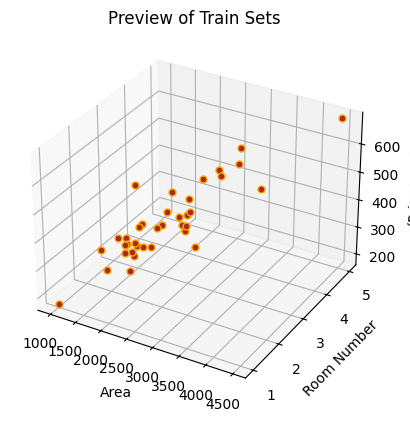

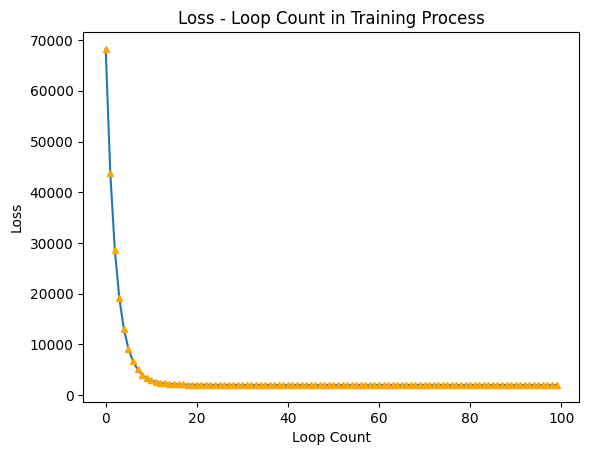

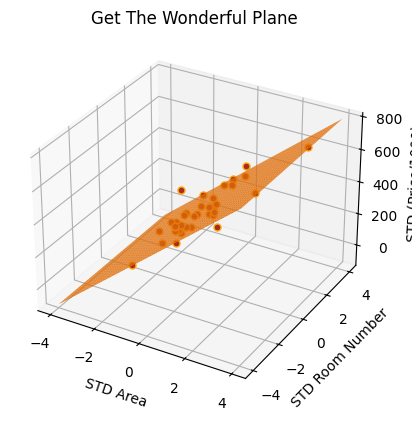

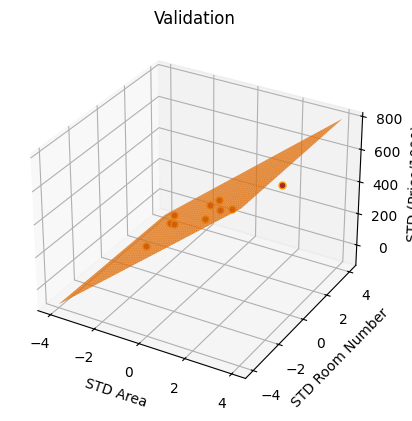

Stabled Loss Value of Training Process: 2027.2547872027424
Loss Value of Validation Task: 2646.5551344115825


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def Standardization(data_list):
    data_mean = np.mean(data_list)
    data_std_variance = np.std(data_list)
    std_data_list = [(data - data_mean) / data_std_variance for data in data_list]
    return std_data_list, data_mean, data_std_variance

def Predict(vector_feature_list, vector_parameter):
    return [np.dot(vector_parameter, vector_feature) for vector_feature in vector_feature_list]

def Get_Loss(error_list):
    return np.linalg.norm(error_list) ** 2 / 2.0 / len(error_list)


source_data_abs_path = 'E:/Python Program File/regress_data2.csv'
source_data = pd.read_csv(source_data_abs_path)

validation_set_size = 10

line_num = source_data.shape[0]
column_num = source_data.shape[1]
train_set_size = line_num - validation_set_size
data_list_list = []
for i in range(column_num):
    data_list_list.append(source_data.iloc[:, i])

# Need a better way to divide given data sets

area_list = data_list_list[0][0: train_set_size]
room_num_list = data_list_list[1][0: train_set_size]
price_list = data_list_list[2][0: train_set_size]
price_list /= 1000

figure = plt.figure()
subplot = figure.add_subplot(projection='3d')
subplot.plot(area_list, room_num_list, price_list,
             marker='o', markersize=5,
             markerfacecolor='brown', markeredgecolor='orange', linestyle='none')

subplot.set_title('Preview of Train Sets')
subplot.set_xlabel('Area', fontsize=10)
subplot.set_ylabel('Room Number', fontsize=10)
subplot.set_zlabel('(Price/1000)', fontsize=10)

plt.show()

# figure = plt.figure()

# subplot = figure.add_subplot()
# subplot.plot(area_list, price_list,
#              marker='o', markersize=5,
#              markerfacecolor='purple', markeredgecolor='blue', linestyle='none')

# subplot.set_xlabel('Area', fontsize=10)
# subplot.set_ylabel('Price', fontsize=10)

# plt.show()

# Assumption: Gaussian Distributed

std_area_list, area_mean, area_std_variance = Standardization(area_list)
std_room_num_list, room_num_mean, room_num_std_variance = Standardization(room_num_list)

feature_vector_list = []
for i in range(train_set_size):
    feature_vector_list.append([std_area_list[i], std_room_num_list[i], 1.0])

loss_history_list = []

# Q:How to give better initial guess

omega_list = [0.0, 0.0, 0.0]
learning_rate = 0.2

# Q:How to upgrade learning rate

for loop_count in range(100):

    gradient_vector = [0.0, 0.0, 0.0]
    prediction_list = Predict(feature_vector_list, omega_list)
    error_list = price_list - prediction_list
    loss = Get_Loss(error_list)
    loss_history_list.append(loss)

    for i in range(len(gradient_vector)):
        for j in range(len(feature_vector_list)):
            gradient_vector[i] += (-2) * error_list[j] * feature_vector_list[j][i]

    gradient_array = np.array(gradient_vector)
    gradient_array /= 2.0*len(feature_vector_list)
    omega_list -= gradient_array * learning_rate

x_list = [i for i in range(100)]
figure = plt.figure()

subplot = figure.add_subplot()
subplot.plot(x_list, loss_history_list,
             marker='^', markersize=5,
             markerfacecolor='orange', markeredgecolor='orange')

subplot.set_title('Loss - Loop Count in Training Process')
subplot.set_xlabel('Loop Count', fontsize=10)
subplot.set_ylabel('Loss', fontsize=10)
plt.show()

figure = plt.figure()
subplot = figure.add_subplot(projection='3d')
subplot.plot(std_area_list, std_room_num_list, price_list,
             marker='o', markersize=5,
             markerfacecolor='brown', markeredgecolor='orange', linestyle='none')

x = np.linspace(-4, 4, 80)
y = np.linspace(-4, 4, 80)
x, y = np.meshgrid(x, y)
z = (omega_list[0] * x + omega_list[1] * y + omega_list[2])
subplot.plot_surface(x, y, z)

subplot.set_title('Get The Wonderful Plane')
subplot.set_xlabel('STD Area', fontsize=10)
subplot.set_ylabel('STD Room Number', fontsize=10)
subplot.set_zlabel('STD (Price/1000)', fontsize=10)

plt.show()

# Get Indexed Omega List

val_area_list = data_list_list[0][train_set_size: line_num]
val_room_num_list = data_list_list[1][train_set_size: line_num]
val_price_list = data_list_list[2][train_set_size: line_num]
val_price_list /= 1000

std_val_area_list = [(area - area_mean) / area_std_variance for area in val_area_list]
std_val_room_num_list = [(room_num - room_num_mean) / room_num_std_variance for room_num in val_room_num_list]

feature_vector_list = []
for i in range(validation_set_size):
    feature_vector_list.append([std_val_area_list[i], std_val_room_num_list[i], 1.0])

prediction_list = Predict(feature_vector_list, omega_list)
val_error_list = val_price_list - prediction_list
loss = Get_Loss(val_error_list)

figure = plt.figure()
subplot = figure.add_subplot(projection='3d')
subplot.plot(std_val_area_list, std_val_room_num_list, val_price_list,
             marker='o', markersize=5,
             markerfacecolor='brown', markeredgecolor='orange', linestyle='none')

x = np.linspace(-4, 4, 80)
y = np.linspace(-4, 4, 80)
x, y = np.meshgrid(x, y)
z = (omega_list[0] * x + omega_list[1] * y + omega_list[2])
subplot.plot_surface(x, y, z)

subplot.set_title('Validation')
subplot.set_xlabel('STD Area', fontsize=10)
subplot.set_ylabel('STD Room Number', fontsize=10)
subplot.set_zlabel('STD (Price/1000)', fontsize=10)

plt.show()

print('Stabled Loss Value of Training Process: '+str(loss_history_list[99]))
print('Loss Value of Validation Task: '+str(loss))